# Control de tiempo finito

- Observar que el controlador digital obtenido no es realizable siguiendo la teoría de control de tiempo continuo

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import control as ctrl


In [24]:
# Parámetros
Ts = 0.1  # Período de muestreo
N = 10  # Número de muestras

# Doble integrador continuo: G(s) = 1/s^2
num = [1]
den = [1, 0, 0]
G = ctrl.TransferFunction([1], [1,0,0])
print("Planta (tiempo continuo):")
display(G)

# Discretización por ZOH
G_d = ctrl.c2d(G, Ts, method='zoh')
print("Planta (tiempo discreto):")
display(G_d)
print("Polos=",G_d.poles())
print("Ceros=",G_d.zeros())

# Deadbeat controller para doble integrador: C(z) = (z-1)^2 / (z^2)
# (lleva la salida al valor deseado en 2 pasos)
C = ctrl.TransferFunction([1, -2, 1], [1, 0, 0],dt=Ts) / Ts**2
print("Controlador (tiempo discreto):")
display(C)

# Sistema en lazo cerrado (deadbeat)
Gl_d = ctrl.minreal(C*G_d)
Gcl_d = ctrl.feedback(Gl_d, 1)
Gcl_d = Gl_d 
print("Sistema en lazo cerrado (tiempo discreto):")
display(Gcl_d)



Planta (tiempo continuo):


TransferFunction(array([1]), array([1, 0, 0]))

Planta (tiempo discreto):


TransferFunction(array([0.005, 0.005]), array([ 1., -2.,  1.]), 0.1)

Polos= [1.+6.68896751e-09j 1.-6.68896751e-09j]
Ceros= [-1.+0.j]
Controlador (tiempo discreto):


TransferFunction(array([ 1, -2,  1]), array([0.01, 0.  , 0.  ]), 0.1)

2 states have been removed from the model
Sistema en lazo cerrado (tiempo discreto):


TransferFunction(array([0.5, 0.5]), array([1., 0., 0.]), 0.1)

Respuesta al escalón: [0.  0.5 1.  1.  1.  1.  1.  1.  1.  1. ]


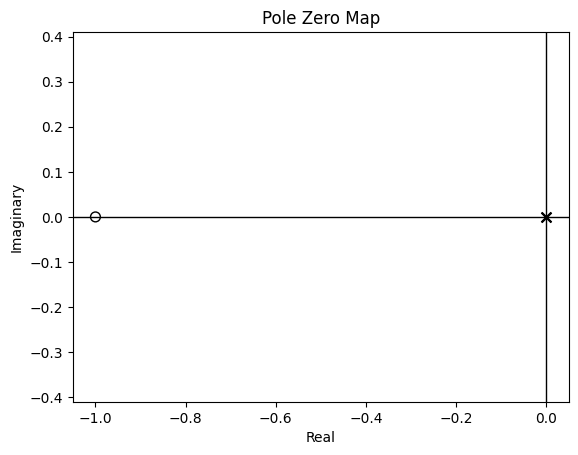

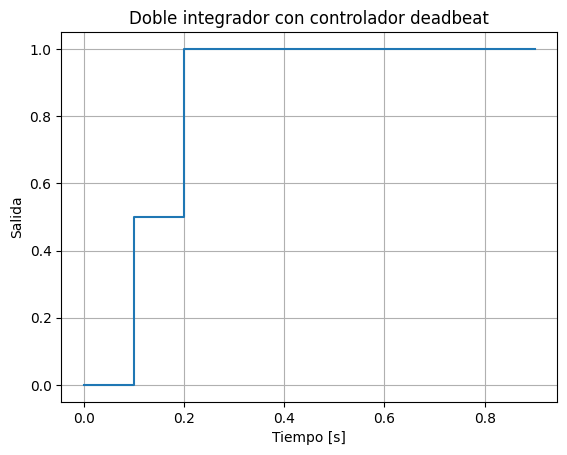

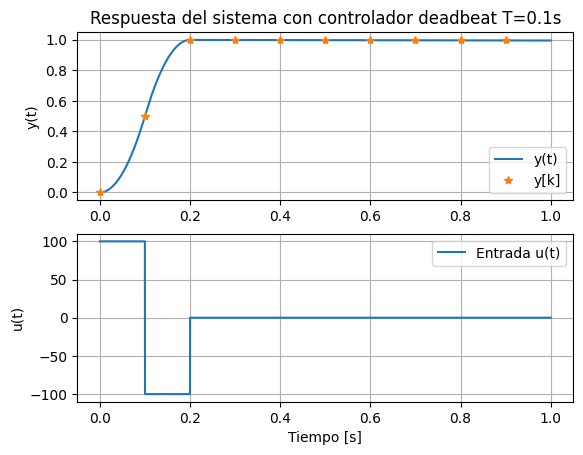

In [25]:

plt.figure(1)
ctrl.pzmap(Gcl_d, plot=True)

# Simulación de la respuesta al escalón
n = np.arange(N)
t_k, y_k = ctrl.step_response(Gcl_d, T=Ts*n)
print("Respuesta al escalón:", y_k)

plt.figure(2)
plt.step(t_k, y_k, where='post')
plt.xlabel('Tiempo [s]')
plt.ylabel('Salida')
plt.title('Doble integrador con controlador deadbeat')
plt.grid()
#plt.show()


# Implementación
# Con la ley de control, ahora calculamos la entrada del sistema de tiempo
# continuo considerando que tenemos un ZOH (Zero-Order Hold) 

# Se calcula la ley de control
u_k = np.zeros_like(n)  # salida del controlador (entrada a la planta)
_, u_k = ctrl.step_response(C, T=Ts*n)

# Preparamos la entrada considerando que pasa por el ZOH
t_total = Ts * len(u_k)
t_step = 0.0001      # resolución del tiempo de simulación

# Tiempo de simulación de alta resolución
t = np.arange(0, t_total, t_step)

# Construir entrada u(t) como escalón por tramos (ZOH)
u = np.zeros_like(t)
for k, uu in enumerate(u_k):
    idx = (t >= k*Ts) & (t < (k+1)*Ts)
    u[idx] = uu 

t_out, y = ctrl.forced_response(G, T=t, U=u)
plt.figure(3)
plt.subplot(2,1,1); plt.grid()
plt.plot(t_out, y, label="y(t)")
plt.plot(t_k, y_k,'*', label="y[k]")
plt.legend()
plt.title(f"Respuesta del sistema con controlador deadbeat T={Ts}s")
plt.ylabel("y(t)")
plt.subplot(2,1,2); plt.grid()
plt.plot(t, u, label="Entrada u(t)")
plt.xlabel("Tiempo [s]")
plt.ylabel("u(t)")
plt.legend()
plt.show()


## ¿Qué significa un polo en [-1,1]?

Text(0, 0.5, 'Salida')

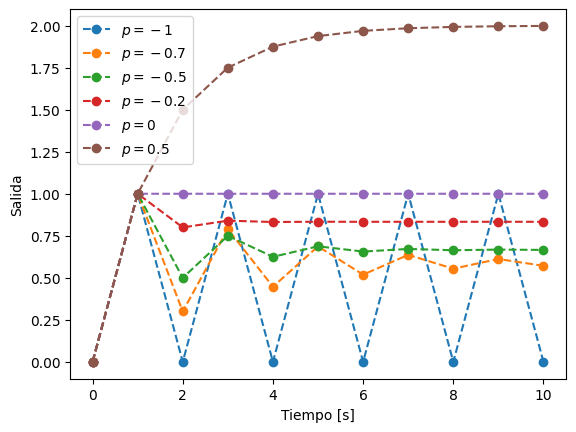

In [20]:
z = ctrl.TransferFunction.z

pp = [1,0.7,0.5,0.2,0,-0.5]##,-1]
for p in pp:
    H = 1/(z+p)

    t,y = ctrl.step_response(H,T=10)
    plt.plot(t,y,'o--',label=f"$p={-p}$")

plt.legend()
plt.xlabel('Tiempo [s]')
plt.ylabel('Salida')